# Proyecto 2: EDA Ingresos Públicos de Brasil

## 1. Lectura y Exploración Inicial

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import translators as ts
import os

Cogemos los nombres de los archivos para luego importarlos.

In [3]:
list_df_str = os.listdir(r"datos")[:-1]
print(list_df_str)

['datos-2013.csv', 'datos-2014.csv', 'datos-2015.csv', 'datos-2016.csv', 'datos-2017.csv', 'datos-2018.csv', 'datos-2019.csv', 'datos-2020.csv', 'datos-2021.csv']


Generamos una lista de dataframes.

In [4]:
dfs_initial = list(map(lambda s: pd.read_csv(r"datos/"+s, sep = ";"), list_df_str))

Lista con los años de ejercicio de cada informe.

In [5]:
yearslist = list(map(int, map(lambda x: x.split("-")[1][:4], list_df_str)))
print(yearslist)

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


Creamos una función que nos rellene las filas vacías de los años, teniendo en cuenta que debe tener el valor del ejercicio.

In [6]:
def fill_years(df_list, years_list):
    clean_dfs = []
    i = 0
    for df in df_list:
        df["ANO EXERCÍCIO"] = df["ANO EXERCÍCIO"].fillna(years_list[i])
        clean_dfs.append(df)
        i+=1
    return clean_dfs

Comprobamos que funcione

In [7]:
dfs = fill_years(dfs_initial, yearslist)

In [8]:
for df in dfs:
   print(df["ANO EXERCÍCIO"].unique())

[2013.]
[2014.]
[2015.]
[2016.]
[2017.]
[2018.]
[2019.]
[2020.]
[2021.]


Vamos a comprobar si todos los datos tienen las mismas columnas.

In [9]:
column_checker = []
for i in range(len(dfs)):
    if i == len(dfs)-1:
        break
    column_checker.append(all(dfs[i].columns == dfs[i+1].columns))
all(column_checker)

True

Todos los datos tienen las mismas columnas: ✅

In [10]:
first_datayear = int(list_df_str[0].split("-")[1][:4])

In [11]:
if first_datayear == reduce(lambda x,y: x if np.all(x.dtypes==y.dtypes) else None, dfs)["ANO EXERCÍCIO"].unique():
    print("Los types de los valores son consistentes")

Los types de los valores son consistentes


In [12]:
df_merged = pd.concat(dfs).reset_index(drop = True)

In [13]:
df_merged.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'CATEGORIA ECONÔMICA', 'ORIGEM RECEITA', 'ESPÉCIE RECEITA',
       'DETALHAMENTO', 'VALOR PREVISTO ATUALIZADO', 'VALOR LANÇADO',
       'VALOR REALIZADO', 'PERCENTUAL REALIZADO', 'DATA LANÇAMENTO',
       'ANO EXERCÍCIO'],
      dtype='object')

In [14]:
newcol = {i:ts.translate_text(i,  to_language = "en").lower().replace(r" ",  r"_") for i in df_merged.columns}
df_merged.rename(columns=newcol, inplace = True)

In [15]:
df_merged.head()

,superior_body_code,name_superior_body,organ_code,organ_name,management_unit_code,name_management_unit,economy_category,source_revenue,recipe_species,detailing,updated_estimated_value,value_launched,realized_value,percentage_realized,release_date,financial_year
0,63000.0,NaN,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIVIDA ATIVA NAO TRIBUTARIA DE OUTRAS REC,"0,00","0,00","1297,13","0,00",31/12/2013,2013.0
1,63000.0,Advocacia-Geral da União,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",RECUPERACAO DE DESPESAS DE EXERC. ANTERIORES,"0,00","0,00","26666621,42","0,00",31/12/2013,2013.0
2,63000.0,Advocacia-Geral da União,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Multas administrativas, contratuais e judicia",OUTRAS MULTAS E JUROS DE MORA,"0,00","0,00","301251,13","0,00",31/12/2013,2013.0
3,63000.0,NaN,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Bens, Direitos e Valores Incorporados ao Patr",REC.DIV.ATIVA POR INFRAÇÃO ADMINISTRATIVA,"0,00","0,00","1855,58","0,00",31/12/2013,2013.0
4,63000.0,Advocacia-Geral da União,63000.0,Advocacia-Geral da União - Unidades com víncul...,110060.0,COORD. GERAL DE ORC. FIN. E ANAL. CONT. - AGU,Receitas Correntes,Outras Receitas Correntes,"Indenizações, restituições e ressarcimentos",OUTRAS RESTITUICOES,"0,00","0,00","52140,68","0,00",31/12/2013,2013.0


In [16]:
def dict_codes_gen(code, name):
    dict_codes = dict()
    for i in range(len(code)):
        if pd.isna(code[i]) or pd.isna(name[i]) or code[i] in dict_codes.keys():
            continue
        else:
            dict_codes[code[i]] = name[i]
    return dict_codes

Comprobamos si hay columnas nulas.

In [17]:
print(f"{df_merged.isna().all(axis = 0).sum()} columnas nulas.")

0 columnas nulas.


In [18]:
df_merged.isna().sum()/df_merged.shape[0]

superior_body_code         0.029581
name_superior_body         0.350001
organ_code                 0.024473
organ_name                 0.033993
management_unit_code       0.032720
name_management_unit       0.018982
economy_category           0.018492
source_revenue             0.037434
recipe_species             0.031109
detailing                  0.028585
updated_estimated_value    0.050000
value_launched             0.025742
realized_value             0.038454
percentage_realized        0.023516
release_date               0.023220
financial_year             0.000000
dtype: float64

Creamos diccionarios donde se relacionan el código de una entidad con su nombre.

In [19]:
superior_body_dict = dict_codes_gen(df_merged["superior_body_code"].values, df_merged["name_superior_body"].values)
organ_dict = dict_codes_gen(df_merged["organ_code"].values, df_merged["organ_name"].values)
management_dict = dict_codes_gen(df_merged["management_unit_code"].values, df_merged["name_management_unit"].values)

In [20]:
df_merged.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year'],
      dtype='object')

In [21]:
df_merged[["superior_body_code", "name_superior_body"]].isna().all(axis = 1).sum()

10545

In [22]:
df_merged.isna().sum()

superior_body_code          30359
name_superior_body         359206
organ_code                  25117
organ_name                  34887
management_unit_code        33581
name_management_unit        19481
economy_category            18978
source_revenue              38418
recipe_species              31927
detailing                   29337
updated_estimated_value     51315
value_launched              26419
realized_value              39465
percentage_realized         24134
release_date                23831
financial_year                  0
dtype: int64

Ahora lo que hacemos es llenar los vacíos de los nombres con el que les corresponda según el diccionario generado para cada columna. Hacemos un map, el cual nos llenará los valores si los encuentra, y si no, asignará un vacío a la celda. Esto supone un problema, pero lo podemos solucionar fácilmente si aplicamos posteriormente un fillna, que rellenará los vacíos generados con el map con sus valores originales, y los que fueron rellenados mantendrán su estado de rellenado.

In [23]:
df_merged['organ_name'] = df_merged['organ_code'].map(organ_dict).fillna(df_merged['organ_name'])
df_merged['name_superior_body'] = df_merged['superior_body_code'].map(superior_body_dict).fillna(df_merged['name_superior_body'])
df_merged['name_management_unit'] = df_merged['management_unit_code'].map(management_dict).fillna(df_merged['name_management_unit'])

Podemos comprobar que los vacíos en las columnas de los nombres han disminuido significativamente.

In [24]:
df_merged.isna().sum()

superior_body_code         30359
name_superior_body         10545
organ_code                 25117
organ_name                   905
management_unit_code       33581
name_management_unit         614
economy_category           18978
source_revenue             38418
recipe_species             31927
detailing                  29337
updated_estimated_value    51315
value_launched             26419
realized_value             39465
percentage_realized        24134
release_date               23831
financial_year                 0
dtype: int64

Ahora podemos fijarnos que podría pasar lo mismo para los códigos de las entidades: existen nombre pero hay valores nulos en su código. Lo bueno es que al haber generado los diccionarios donde se asocian ambas solo necesitamos invertir las keys y los valores de los diccionarios generados antes y volver a aplicar el mismo método para las columnas con los códigos, esta vez buscando los nombres de cada entidad de cada fila en el diccionario nuevo.

In [25]:
organ_name_to_code = {value: key for key, value in organ_dict.items()}
superior_body_name_to_code = {value: key for key, value in superior_body_dict.items()}
management_unit_name_to_code = {value: key for key, value in management_dict.items()}

In [26]:
df_merged['organ_code'] = df_merged['organ_name'].map(organ_name_to_code).fillna(df_merged['organ_code'])
df_merged['superior_body_code'] = df_merged['name_superior_body'].map(superior_body_name_to_code).fillna(df_merged['superior_body_code'])
df_merged['management_unit_code'] = df_merged['name_management_unit'].map(management_unit_name_to_code).fillna(df_merged['management_unit_code'])

Podemos comprobar de nuevo que los vacíos han sido reducidos sustancialmente.

In [27]:
df_merged.isna().sum()

superior_body_code         10545
name_superior_body         10545
organ_code                   905
organ_name                   905
management_unit_code         614
name_management_unit         614
economy_category           18978
source_revenue             38418
recipe_species             31927
detailing                  29337
updated_estimated_value    51315
value_launched             26419
realized_value             39465
percentage_realized        24134
release_date               23831
financial_year                 0
dtype: int64

Ahora podemos comprobar que los vacíos existentes son aquellos donde ambas columnas de nombre y código se encuentran vacías, por lo que nuestro método no ha encontrado ningún valor para ninguna de estas.

In [28]:
df_merged[["superior_body_code", "name_superior_body"]].isna().all(axis = 1).sum()

10545

In [29]:
valores = df_merged.columns[df_merged.columns.str.contains("value")].values

In [30]:
def decimal_point_conv(data, columns):
    for col in columns:
        data[col] = data[col].str.replace(",",".").apply(float).abs().round(2)

In [31]:
decimal_point_conv(df_merged, valores)


In [32]:
decimal_point_conv(df_merged, ["percentage_realized"])

In [33]:
df_merged.percentage_realized.sort_values(ascending=False).head(20).index

Index([ 5190,  6193,  4289, 10427,  5762,  3407,  1080,  1303,  3971,  7111,
        5604,  3561,  3545,  6997,  7558,   608,  6622,  1520,  9370,  2662],
      dtype='int64')

In [34]:
(df_merged.iloc[df_merged.percentage_realized.sort_values(ascending=False).head(10).index].head(1))

,superior_body_code,name_superior_body,organ_code,organ_name,management_unit_code,name_management_unit,economy_category,source_revenue,recipe_species,detailing,updated_estimated_value,value_launched,realized_value,percentage_realized,release_date,financial_year
5190,25000.0,Ministério da Economia,25000.0,Ministério da Economia - Unidades com vínculo ...,170013.0,SETORIAL ORCAMENTARIA E FINANCEIRA / ME,Receitas Correntes,Contribuições,Contribuições sociais,OUTRAS CONTRIBUICOES SOCIAIS,2.0,0.0,1447275.45,72363772.0,NaN,2014.0


In [35]:
df_merged.iloc[5190	]

superior_body_code                                                   25000.0
name_superior_body                                    Ministério da Economia
organ_code                                                           25000.0
organ_name                 Ministério da Economia - Unidades com vínculo ...
management_unit_code                                                170013.0
name_management_unit                 SETORIAL ORCAMENTARIA E FINANCEIRA / ME
economy_category                                          Receitas Correntes
source_revenue                                                 Contribuições
recipe_species                                         Contribuições sociais
detailing                                       OUTRAS CONTRIBUICOES SOCIAIS
updated_estimated_value                                                  2.0
value_launched                                                           0.0
realized_value                                                    1447275.45

In [36]:
df_merged.iloc[df_merged["value_launched"].idxmax(axis = 0)]

superior_body_code                                                   25000.0
name_superior_body                                    Ministério da Economia
organ_code                                                           25000.0
organ_name                 Ministério da Economia - Unidades com vínculo ...
management_unit_code                                                170010.0
name_management_unit             SECRETARIA DA RECEITA FEDERAL DO BRASIL-RFB
economy_category                                          Receitas Correntes
source_revenue                   Impostos, Taxas e Contribuições de Melhoria
recipe_species                                                      Impostos
detailing                          PESSOAS JURIDICAS - LIQUIDA DE INCENTIVOS
updated_estimated_value                                                  0.0
value_launched                                           357160677863.969971
realized_value                                                           0.0

In [37]:
# def detectar_anomalias(df):
#     df['realized_value'].fillna(0, inplace=True)  # Reemplaza NaN por 0 en valor realizado para evitar errores
#     df['calculated_percentage'] = (df['realized_value'] / df['updated_estimated_value']) * 100

#     df['anomaly_high_percentage'] = df['calculated_percentage'] > 1000
#     df['anomaly_value_launched_vs_realized'] = (df['value_launched'] == 0) & (df['realized_value'] > 0)
#     df['anomaly_low_estimated_value'] = (df['updated_estimated_value'] < df['realized_value'] * 0.01)

#     anomalies = df[(df['anomaly_high_percentage']) | 
#                    (df['anomaly_value_launched_vs_realized']) | 
#                    (df['anomaly_low_estimated_value'])]

#     return anomalies.drop("calculated_percentage", axis = 1)


Creamos una función que nos diga si hay fechas inconsistentes entre años. Esta consistirá en comparar los nulos de la columna de fechas con valores donde la columna año no coincida con el año en la de fechas. Si todas dan 0 significa que todas tienen las fechas bien (o bien vacías).

In [38]:
def check_date_consistency(dataframe_list):
    diffs = []
    for df in dataframe_list:
        years_from_date = pd.to_datetime(df["DATA LANÇAMENTO"], format="%d/%m/%Y").dt.year
        years = df["ANO EXERCÍCIO"]
        boolean_series = years != years_from_date
        sum_bool = boolean_series.sum()
        nas = df["DATA LANÇAMENTO"].isna().sum()
        diff = sum_bool-nas
        diffs.append(diff)
    return diffs


Vemos que de hecho todas las fechas están en el año que les corresponde.

In [39]:
check_date_consistency(dfs)

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
df_merged["release_date"] = pd.to_datetime(df_merged["release_date"], format = "%d/%m/%Y")

Comprobemos ahora que todas las columnas mantienen un formato correcto.

In [41]:
df_merged.groupby("financial_year")["realized_value"].describe()

,count,mean,std,min,25%,50%,75%,max
financial_year,,,,,,,,
2013.0,4309.0,3.862179e+08,7.247314e+09,0.0,601.0000,49326.000,985939.6500,4.137862e+11
2014.0,4328.0,5.114653e+08,1.031421e+10,0.0,429.1125,45707.205,996881.7350,5.484912e+11
2015.0,4351.0,6.058369e+08,1.329782e+10,0.0,522.6550,47304.270,920769.6100,7.711177e+11
2016.0,188766.0,1.816033e+07,8.926813e+08,0.0,228.0000,2269.645,29738.8275,1.998532e+11
2017.0,182807.0,1.481200e+07,4.349996e+08,0.0,249.1000,2450.000,31564.5550,1.007173e+11
2018.0,165640.0,1.796284e+07,6.327564e+08,0.0,336.3400,3267.265,39941.1675,1.692564e+11
2019.0,169191.0,1.906364e+07,4.795747e+08,0.0,360.0000,3516.930,42182.2800,6.043923e+10
2020.0,138063.0,2.671846e+07,1.113659e+09,0.0,390.3150,4895.030,63349.7100,3.500223e+11
2021.0,129379.0,3.015142e+07,7.030509e+08,0.0,390.0000,4885.250,65569.7750,5.534029e+10


In [42]:
(df_merged[df_merged["realized_value"] == 0].shape[0] + df_merged["realized_value"].isna().sum())/df_merged.shape[0]

0.058156541124954816

In [43]:
Q1 = df_merged['realized_value'].quantile(0.25)
Q3 = df_merged['realized_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged_no_out =  df_merged[(df_merged['realized_value'] >= lower_bound) & (df_merged['realized_value'] <= upper_bound)]


In [44]:
df_merged_no_out.groupby("financial_year")["realized_value"].describe()

,count,mean,std,min,25%,50%,75%,max
financial_year,,,,,,,,
2013.0,2480.0,16027.071008,26629.794871,0.0,0.0000,1656.805,20582.9550,109516.00
2014.0,2507.0,15410.838337,25922.069183,0.0,0.0000,1326.150,18812.8900,109517.89
2015.0,2495.0,15611.206713,26394.644071,0.0,0.0000,1539.000,19796.4200,109202.75
2016.0,159055.0,9839.349625,20098.719491,0.0,150.4650,1131.540,7700.1600,109545.07
2017.0,153312.0,9886.586978,19964.423232,0.0,162.0000,1187.000,7894.8575,109541.99
2018.0,136139.0,10471.263300,20338.475836,0.0,208.7200,1500.000,9259.6300,109541.60
2019.0,138280.0,10545.669548,20232.499920,0.0,222.2800,1583.060,9661.5875,109542.03
2020.0,109480.0,11969.826449,21781.555319,0.0,206.0825,1800.000,11878.3250,109530.31
2021.0,102131.0,11878.246624,21643.561364,0.0,201.0500,1734.800,11852.9150,109527.07


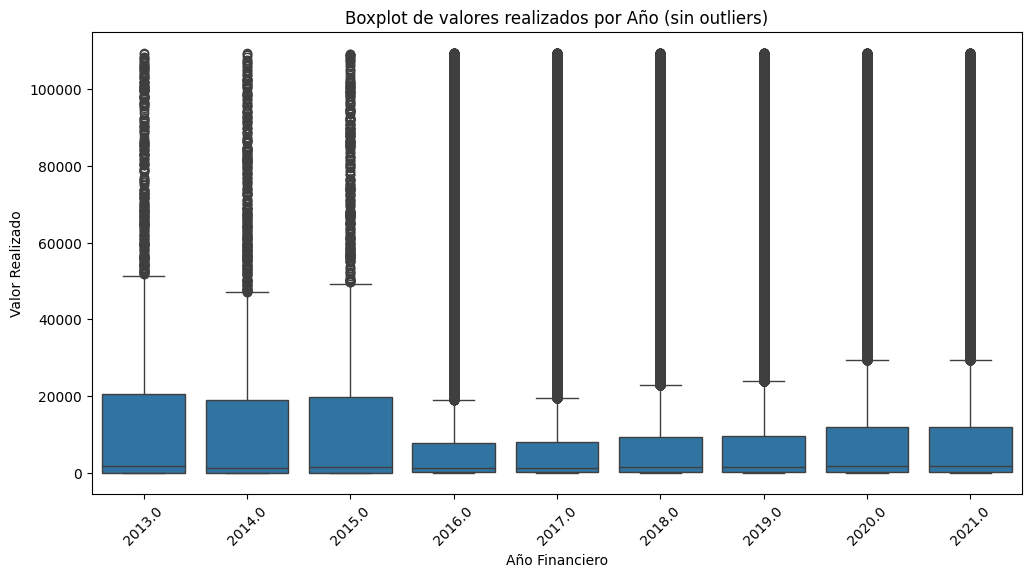

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged_no_out, x='financial_year', y='realized_value')
plt.title('Boxplot de valores realizados por Año (sin outliers)')
plt.xlabel('Año Financiero')
plt.ylabel('Valor Realizado')
plt.xticks(rotation=45)
plt.show()

In [46]:
df_no_zeros = df_merged[df_merged['realized_value'] > 0].dropna(subset="realized_value")

Q1 = df_no_zeros['realized_value'].quantile(0.25)
Q3 = df_no_zeros['realized_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_merged_no_out_no_0 =  df_no_zeros[(df_no_zeros['realized_value'] >= lower_bound) & (df_no_zeros['realized_value'] <= upper_bound)]


In [47]:
df_merged.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year'],
      dtype='object')

In [48]:
df_merged["economy_category"].unique()

array(['Receitas Correntes', 'Receitas de Capital', nan,
       'Receitas Correntes - intra-orçamentárias', 'Sem informação',
       'Receitas de Capital - intra-orçamentárias'], dtype=object)

In [49]:
df_merged["economy_category"] = df_merged["economy_category"].fillna("Sem informação")

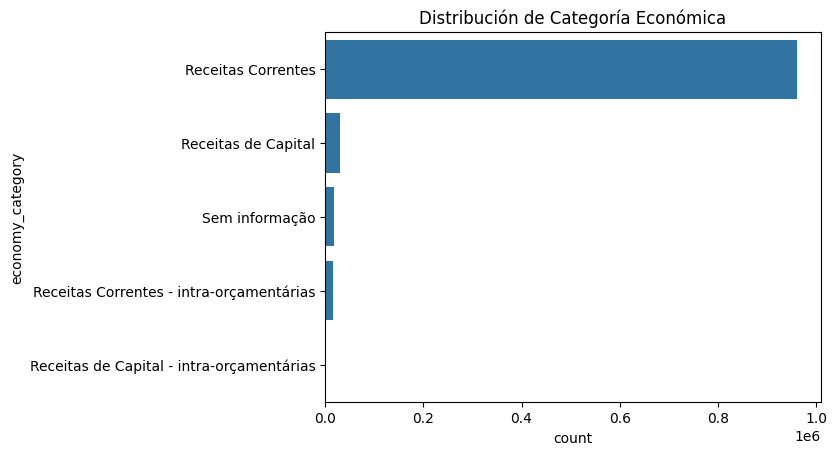

In [50]:
sns.countplot(y='economy_category', data=df_merged)
plt.title('Distribución de Categoría Económica')
plt.show()

In [69]:
df_merged["organ_name"].value_counts().head(10).keys()

Index(['Ministério da Economia - Unidades com vínculo direto',
       'Fundo do Exército', 'Comando da Marinha - Fundo Naval',
       'Fundo Nacional de Cultura',
       'Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis',
       'Empresa Brasileira de Pesquisa Agropecuária',
       'Fundo do Regime Geral da Previdência Social', 'Fundo Aeronáutico',
       'Fundo Nacional de Desenvolvimento Científico e Tecnológico',
       'Instituto Nacional de Metrologia, Qualidade e Tecnologia'],
      dtype='object', name='organ_name')

In [75]:
df_merged.groupby("organ_name")["realized_value"].sum().reset_index().sort_values(by = "realized_value", ascending=False).head(10)

,organ_name,realized_value
200,Ministério da Economia - Unidades com vínculo ...,2.117649e+13
136,Fundo do Regime Geral da Previdência Social,3.484603e+12
121,Fundo de Amparo ao Trabalhador,3.534822e+11
192,Instituto Nacional do Seguro Social,3.176385e+11
111,Fundo Nacional de Desenvolvimento da Educação,2.064023e+11
11,"Agência Nacional do Petróleo, Gás Natural e Bi...",1.137013e+11
53,Departamento do Fundo da Marinha Mercante,6.470355e+10
3,Agência Nacional de Energia Elétrica,6.044446e+10
107,Fundo Nacional de Aviação Civil,4.088149e+10
124,Fundo de Defesa da Economia Cafeeira,3.463859e+10


In [67]:
df_merged.groupby("organ_name")["realized_value"].describe().reset_index().sort_values(by = "mean", ascending=False)

,organ_name,count,mean,std,min,25%,50%,75%,max
136,Fundo do Regime Geral da Previdência Social,11937.0,2.919162e+08,2.347844e+09,0.00,4.181060e+03,5.444017e+05,1.094952e+07,1.100556e+11
120,Fundo Soberano do Brasil,95.0,2.060049e+08,6.349295e+08,2723.95,5.167025e+07,5.922965e+07,7.017320e+07,3.500000e+09
200,Ministério da Economia - Unidades com vínculo ...,114897.0,1.843085e+08,4.057788e+09,0.00,1.200800e+03,2.149683e+04,1.014622e+06,7.711177e+11
121,Fundo de Amparo ao Trabalhador,7226.0,4.891811e+07,4.014500e+08,0.00,2.174685e+03,4.795314e+04,4.216085e+05,8.741461e+09
131,Fundo de Garantia à Exportação,658.0,4.648524e+07,1.861965e+08,0.00,2.407901e+04,5.133866e+06,5.634315e+07,3.126248e+09
...,...,...,...,...,...,...,...,...,...
39,Companhia de Desenvolvimento de Barcarena,1.0,1.401900e+02,NaN,140.19,1.401900e+02,1.401900e+02,1.401900e+02,1.401900e+02
99,Fundo Constitucional de Financiamento do Centr...,303.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
100,Fundo Constitucional de Financiamento do Nordeste,303.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
218,Reserva de Contingência,23.0,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [77]:
df_merged.to_csv("datos/df_merged_clean.csv")